Skipped ratio:  0.0


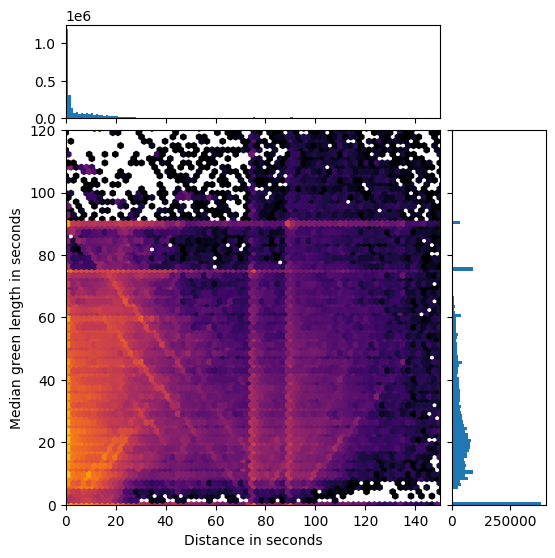

In [172]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

with open('processed_things_2023_11_24.json') as f:
    processed_things = json.load(f)
    
green_lengths = []
distances = []

def scatter_hist(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.hexbin(x, y, gridsize=400, bins="log", cmap='inferno')
    ax.set_xlabel("Distance in seconds")
    ax.set_ylabel("Median green length in seconds")
    ax.set_ylim(0, 120)
    ax.set_xlim(0, 150)

    # now determine nice limits by hand:
    binwidth = 1
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')

skipped_count = 0
total_count = 0
for thing_name, thing in processed_things.items():
    for day_idx in range(7):
        for hour_idx in range(24):
            if thing["Metrics"][day_idx][hour_idx] != -1.0 and thing["MedianGreenLengths"][day_idx][hour_idx] != -1.0:
                # if thing["MedianGreenLengths"][day_idx][hour_idx] == 0 and thing["Metrics"][day_idx][hour_idx] == 0:
                #     skipped_count += 1
                #     continue
                total_count += 1
                green_lengths.append(thing["MedianGreenLengths"][day_idx][hour_idx])
                distances.append(thing["Metrics"][day_idx][hour_idx])
                
print("Skipped ratio: ", skipped_count / total_count)
                
fig = plt.figure(figsize=(6, 6))
# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
# Create the Axes.
ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(distances, green_lengths, ax, ax_histx, ax_histy)



/var/folders/mr/jb109g2j23g3_lypt1qxvpl40000gn/T/ipykernel_9387/1622526605.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmapBig = cm.get_cmap('jet', 512)
/var/folders/mr/jb109g2j23g3_lypt1qxvpl40000gn/T/ipykernel_9387/1622526605.py:39: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
/var/folders/mr/jb109g2j23g3_lypt1qxvpl40000gn/T/ipykernel_9387/1622526605.py:40: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
/var/folders/mr/jb109g2j23g3_lypt1qxvpl40000gn/T/ipykernel_9387/1622526605.py:41: MatplotlibDeprecationWarning: The w_zaxis attribute was

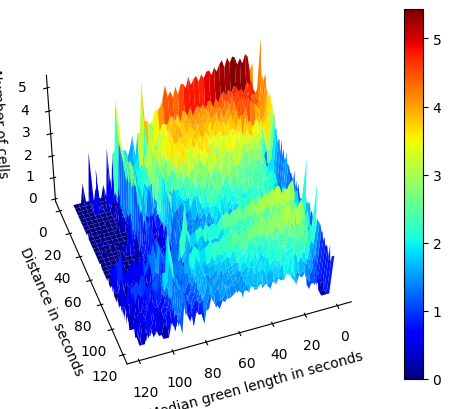

In [171]:
import matplotlib.pyplot as plt
from  matplotlib.colors import LightSource
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

# rotate the camera
ax.view_init(45, 70)

hist, xpos, ypos = np.histogram2d(distances, green_lengths, bins=75, range=[[0, 120], [0, 120]])

# Create meshgrid from xpos and ypos
x, y = np.meshgrid(ypos[:-1], xpos[:-1], indexing="xy")

# Create a colormap based on jet
cmapBig = cm.get_cmap('jet', 512)
newcmp = ListedColormap(cmapBig(np.linspace(0, 1, 256)))

# scale hist in 10-logsscale
for i in range(len(hist)):
    for j in range(len(hist[i])):
        if hist[i][j] != 0:
            hist[i][j] = np.log10(hist[i][j])
        else:
            hist[i][j] = 0
            
light_source = LightSource(azdeg=315, altdeg=90)

# Plot 3D surface
ax.plot_surface(x, y, hist, cmap=newcmp, antialiased=True, shade=True, linewidth=0, lightsource=light_source)

ax.set_ylabel("Distance in seconds")
ax.set_xlabel("Median green length in seconds")
ax.set_zlabel('Number of cells')

# Hide ugly grey pane
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Hide ugly grey grid
ax.w_xaxis._axinfo.update({'grid' : {'color':  (1, 1, 1, 0), 'linewidth': 0, 'linestyle': '-'}})
ax.w_yaxis._axinfo.update({'grid' : {'color':  (1, 1, 1, 0), 'linewidth': 0, 'linestyle': '-'}})
ax.w_zaxis._axinfo.update({'grid' : {'color':  (1, 1, 1, 0), 'linewidth': 0, 'linestyle': '-'}})

# plot colorbar
m = cm.ScalarMappable(cmap=newcmp)
m.set_array(hist)
plt.colorbar(m)

plt.show()

[(0, 0), (0, 1), (1, 0), (1, 1), (0, 2), (2, 0), (1, 2), (2, 1), (2, 2), (0, 3), (3, 0), (1, 3), (3, 1), (2, 3), (3, 2), (0, 4), (4, 0), (1, 4), (4, 1), (3, 3), (2, 4), (4, 2), (0, 5), (3, 4), (4, 3), (5, 0), (1, 5), (5, 1), (2, 5), (5, 2), (4, 4), (3, 5), (5, 3), (0, 6), (6, 0), (1, 6), (6, 1), (2, 6), (6, 2), (4, 5), (5, 4), (3, 6), (6, 3), (0, 7), (7, 0), (1, 7), (5, 5), (7, 1), (4, 6), (6, 4), (2, 7), (7, 2), (3, 7), (7, 3), (5, 6), (6, 5), (0, 8), (8, 0), (1, 8), (4, 7), (7, 4), (8, 1), (2, 8), (8, 2), (6, 6), (3, 8), (8, 3), (5, 7), (7, 5), (4, 8), (8, 4), (0, 9), (9, 0), (1, 9), (9, 1), (2, 9), (6, 7), (7, 6), (9, 2), (5, 8), (8, 5), (3, 9), (9, 3), (4, 9), (9, 4), (7, 7), (0, 10), (6, 8), (8, 6), (10, 0), (1, 10), (10, 1), (2, 10), (10, 2), (5, 9), (9, 5), (3, 10), (10, 3), (7, 8), (8, 7), (4, 10), (10, 4), (6, 9), (9, 6), (0, 11), (11, 0), (1, 11), (11, 1), (2, 11), (5, 10), (10, 5), (11, 2), (8, 8), (3, 11), (7, 9), (9, 7), (11, 3), (6, 10), (10, 6), (4, 11), (11, 4), (0, 12)

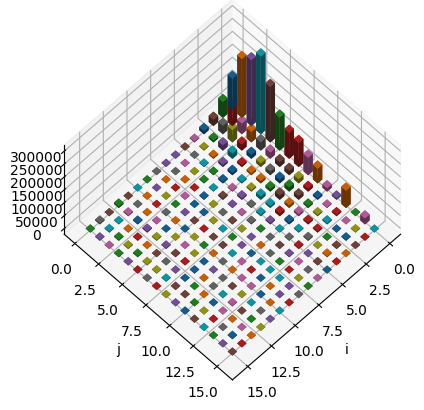

In [44]:
import matplotlib.pyplot as plt
from  matplotlib.colors import LightSource

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

hist, _, _ = np.histogram2d(distances, green_lengths, bins=16, range=[[0, 100], [0, 100]])

dists = []
idxs = []
for i in range(hist.shape[0]):
    for j in range(hist.shape[1]):
        dists.append(np.sqrt(i ** 2 + j ** 2))
        idxs.append((i, j))
        
# Sort idxs by dists
idxs = [idx for _, idx in sorted(zip(dists, idxs), key=lambda pair: pair[0])]
dists = sorted(dists)
max_dist = dists[-1]

max_z = np.max(hist)
        
print(idxs)

light = LightSource(360, 45)
# Set rotation
ax.view_init(45, 45)

# draw bars from back to front
for i, j in idxs:
    z_value = hist[i, j]
    dx = dy = 0.5
    # scale color between max_dist and min_dist
    dist = dists.pop(0)
    # color = plt.cm.inferno(dist / max_dist)
    ax.bar3d(i, j, 0, dx, dy, z_value, zorder=dist)

# Add axis labels
ax.set_xlabel('i')
ax.set_ylabel('j')

plt.savefig("3dhist.png", dpi=300)

/var/folders/mr/jb109g2j23g3_lypt1qxvpl40000gn/T/ipykernel_9387/353138519.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_hist.set_yticklabels(ylabels)


Text(0, 0.5, 'Distance in seconds')

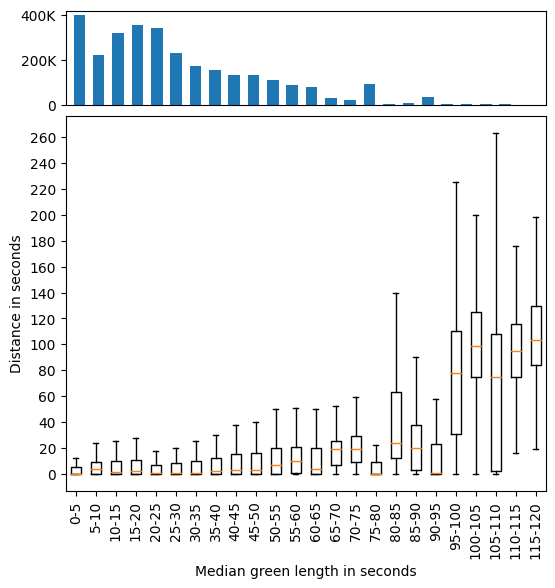

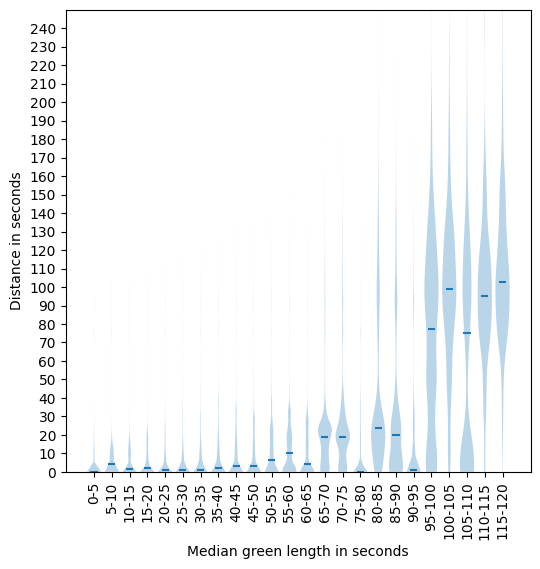

In [232]:
import matplotlib.pyplot as plt

green_length_bins = []
distances_per_bin = []
labels = []
bin_size = 5

# sort green lengths into bins
for i in range(0, 120, bin_size):
    green_length_bins.append([])
    distances_per_bin.append([])
    labels.append(str(i) + "-" + str(i + bin_size))
    
for i in range(len(green_lengths)):
    green_length = green_lengths[i]
    bin_idx = int(green_length / bin_size)
    if bin_idx >= len(green_length_bins):
        continue
    green_length_bins[bin_idx].append(green_length)
    distances_per_bin[bin_idx].append(distances[i])
    
median_distances_per_bin = []
third_quartile_distances_per_bin = []
first_quartile_distances_per_bin = []

for i in range(len(green_length_bins)):
    median_distances_per_bin.append(np.median(distances_per_bin[i]))
    third_quartile_distances_per_bin.append(np.percentile(distances_per_bin[i], 75))
    first_quartile_distances_per_bin.append(np.percentile(distances_per_bin[i], 25))
    
fig = plt.figure(figsize=(6, 6))
gs = fig.add_gridspec(2, 1,  height_ratios=(1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)
ax = fig.add_subplot(gs[1, 0])
ax.boxplot(distances_per_bin,widths=0.5, showfliers=False, labels=labels)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticks(np.arange(0, 280, 20))
ax.set_xlabel("Median green length in seconds")
ax.set_ylabel("Distance in seconds")
ax_hist = fig.add_subplot(gs[0, 0])
ax_hist.hist(green_lengths, bins=np.arange(0, 120, 5), width=3)
ax_hist.set_xlim(-2, 122)
ax_hist.set_xticks([])
ylabels = [('{:,.0f}'.format(x) + 'K') if x != 0 else 0 for x in ax_hist.get_yticks()/1000]
ax_hist.set_yticklabels(ylabels)


fig.savefig("green-lengths-boxplot.pdf", bbox_inches='tight')

fig, ax = plt.subplots(figsize=(6, 6))
ax.violinplot(distances_per_bin, widths=0.8, showmedians=True, showextrema=False)
ax.set_xticks(np.arange(1, len(labels) + 1))
ax.set_xticklabels(labels, rotation=90)
ax.set_ylim(0, 250)
ax.set_yticks(np.arange(0, 250, 10))
ax.set_xlabel("Median green length in seconds")
ax.set_ylabel("Distance in seconds")




